In [51]:
import numpy as np
from sklearn.metrics import pairwise_distances
import seaborn as sns

In [52]:


class knn:
    def __init__(self, k):
        self.k = k
        self.pontos = []
        self.rotulos = []
        
    def fit(self,X, y):
        self.pontos  = X
        self.rotulos = y
        
    @staticmethod
    def dist(p,q):
        return np.sqrt(sum((p-q)**2))
    

    def predict(self, X):
        predicoes = []
        for p in X:
            d = pairwise_distances(self.pontos, [p]).flatten()
            ds = np.argsort(d)
            knn = ds[:self.k]
            rotulos = self.rotulos[knn]
            rotulos, cont = np.unique(rotulos, return_counts=True)
            pred = rotulos[np.argmax(cont)]
            predicoes.append(pred)
        return np.array(predicoes)

In [53]:
p = [1,1,1,2,3]
rotulos, cont = np.unique(p,return_counts=True)
rotulos[np.argmax(cont)]

1

In [54]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [55]:
ds = load_iris(as_frame=True)
df = ds.frame
X = df[["sepal length (cm)", "sepal width (cm)"]]
y = df["target"]

In [56]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X.values,y.values,test_size=0.2, random_state=1, stratify=y.values)

In [57]:
X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape

((120, 2), (30, 2), (120,), (30,))

In [58]:
KNN = knn(k=1)
KNN.fit(X_treino,Y_treino)
KNN.predict(X_teste)

array([2, 0, 1, 0, 0, 0, 2, 2, 1, 1, 0, 1, 1, 2, 1, 0, 2, 1, 1, 1, 2, 1,
       0, 0, 2, 1, 0, 0, 2, 2])

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

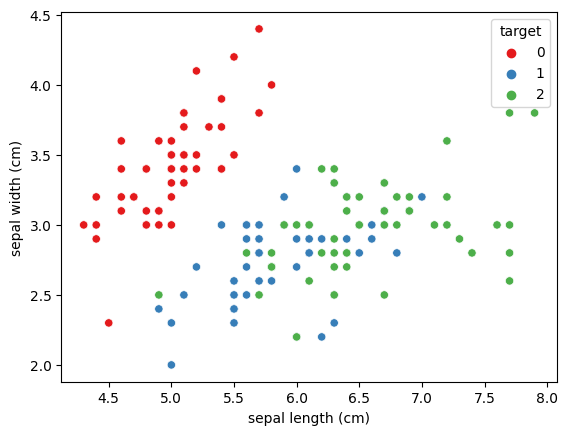

In [45]:
sns.scatterplot(data=df,x="sepal length (cm)", y="sepal width (cm)", hue="target", palette="Set1")